In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from scipy.stats import expon, randint
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('creditcard.csv')  




In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


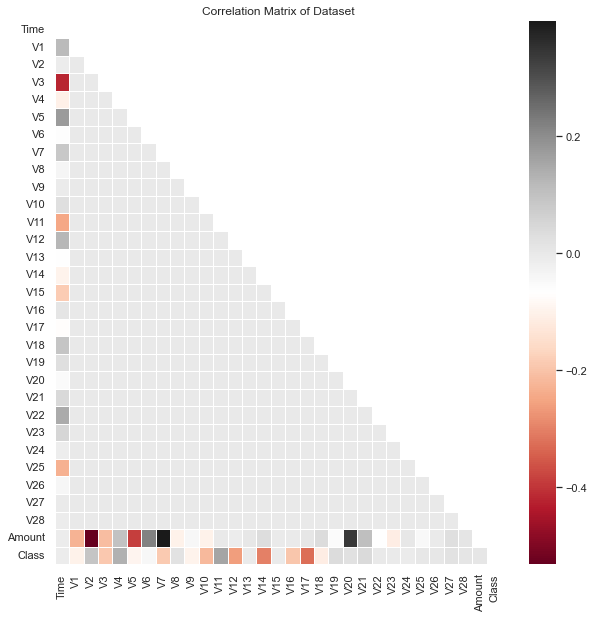

In [53]:

corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 10))

sns.heatmap(corr_matrix, mask=mask, cmap='RdGy', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix of Dataset')
plt.show()

In [18]:
df.isnull().sum().sum()

0

In [4]:
num_rows = df.shape[0]
num_columns = df.shape[1]

print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 284807
Number of Columns: 31


Histogram of Amount and Time 

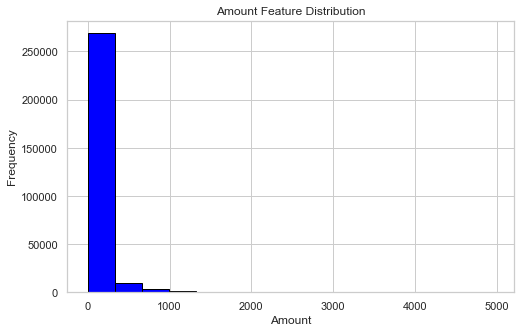

In [42]:
plt.figure(figsize=(8, 5)) 

hist = df[df["Amount"] < 5000] #Very few values are after 5000, so I chose to remove them to show a good dist of the
plt.hist(hist['Amount'], bins=15, color='blue', edgecolor='black')  
plt.title('Amount Feature Distribution')  
plt.xlabel('Amount')  
plt.ylabel('Frequency')  
plt.show() 



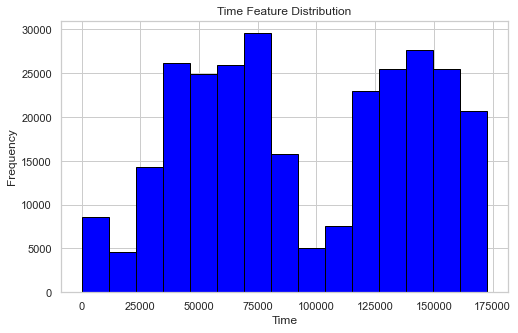

In [43]:
plt.figure(figsize=(8, 5)) 
plt.hist(df['Time'], bins=15, color='blue', edgecolor='black')  
plt.title('Time Feature Distribution')  
plt.xlabel('Time')  
plt.ylabel('Frequency')  

plt.show() 